In [1130]:
import math
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy import sparse
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Naive Bayes

In [1131]:
x_train = open("X_train.txt","r")

def tokenize(string, my_list):
    my_list.append(string.split())

x_train_tweets = []
tokenized_x_train_tweets = []
for tweets in x_train:
    x_train_tweets.append(tweets)
    tokenize(tweets, tokenized_x_train_tweets)
    
x_train_tokens = []   
for tweet in tokenized_x_train_tweets:
    for word in tweet:
        x_train_tokens.append(word)

In [1132]:
y_train = open("y_train.txt","r")

train_tweets_target = []
for x in y_train:
    train_tweets_target.append(int(x))

In [1133]:
# Making lists of tokenized positive tweets and tokenized negative tweets
positive_train_tweets = []
negative_train_tweets = []

i=0
for x in train_tweets_target:
    if x == 0:
        positive_train_tweets.append(x_train_tweets[i])
    else:
        negative_train_tweets.append(x_train_tweets[i])
    i+=1       

In [1134]:
tokenized_positive_train_tweets = []
tokenized_negative_train_tweets = []

for x in positive_train_tweets:
    tokenize(x, tokenized_positive_train_tweets)
    
for x in negative_train_tweets:
    tokenize(x, tokenized_negative_train_tweets)
    
positive_train_tokens = []   
for tweet in tokenized_positive_train_tweets:
    for word in tweet:
        positive_train_tokens.append(word)
        
negative_train_tokens = []   
for tweet in tokenized_negative_train_tweets:
    for word in tweet:
        negative_train_tokens.append(word)

In [1135]:
# Getting the counts of the words from our token lists
count = Counter(x_train_tokens)
count_positive = Counter(positive_train_tokens)
count_negative = Counter(negative_train_tokens)

In [1136]:
keys1 = list(set(x_train_tokens))
len_train_tokens = len(x_train_tokens)
len_targets = len(train_tweets_target)

def train(smoothing_alpha=0):
    global prob_x_dict1
    global prob_pos_tweet
    global prob_neg_tweet
    global prob_x_given_positive_dict
    global prob_x_given_negative_dict
  
    values1 = []
    for word in keys1:
        values1.append(count[word]/len_train_tokens)
    prob_x_dict1 = dict(zip(keys1, values1))
     
    prob_pos_tweet = train_tweets_target.count(0)/len_targets
    prob_neg_tweet = train_tweets_target.count(1)/len_targets
    
    positive_values = []
    negative_values = []
    
    pos_count = len(count_positive)
    neg_count = len(count_negative)
    len_set = len(set(x_train_tokens))
     
    with tqdm(total=len_train_tokens) as pbar:
        for word in x_train_tokens:
            positive_values.append((count_positive[word]+smoothing_alpha)/(len(count_positive)+len_set*smoothing_alpha))
            negative_values.append((count_negative[word]+smoothing_alpha)/(len(count_negative)+len_set*smoothing_alpha))
            pbar.update(1)
            
        prob_x_given_positive_dict = dict(zip(x_train_tokens, positive_values))
        prob_x_given_negative_dict = dict(zip(x_train_tokens, negative_values))
                  
train(smoothing_alpha=1)  

100%|██████████| 129853/129853 [00:00<00:00, 539982.90it/s]


In [828]:
classification = []
def classify(tweet):
    positive = []
    negative = []
    
    for word in tweet:
        if word in prob_x_given_positive_dict:
            positive.append(prob_x_given_positive_dict[word])
        if word in prob_x_given_negative_dict:
            negative.append(prob_x_given_negative_dict[word])
            
    pos = []
    neg = []
    
    for x in positive:
        if x != 0:
            pos.append(math.log(x))
    for x in negative:
        if x != 0:
            neg.append(math.log(x))
            
    pos_post = math.log(prob_pos_tweet) + np.sum(pos)  
    neg_post = math.log(prob_neg_tweet) + np.sum(neg) 
    
    if pos_post > neg_post:
        classification.append(0)
    else:
        classification.append(1)

In [829]:
x_dev = open("X_dev.txt","r")

x_dev_tweets = []
tokenized_x_dev_tweets = []
for tweets in x_dev:
    x_dev_tweets.append(tweets)
    tokenize(tweets, tokenized_x_dev_tweets)
    
y_dev = open("y_dev.txt","r")

dev_tweets_target = []
for x in y_dev:
    dev_tweets_target.append(int(x))

In [830]:
for tweet in tokenized_x_dev_tweets:
    classify(tweet)

In [831]:
x = f1_score(dev_tweets_target, classification, average='binary')
print(x)

0.7164804469273742


In [796]:
# 0.22428748451053285 with regular tokenize and alpha = 0
# 0.7164804469273742 with regular tokenize and alpha = 1
# 0.682437275985663 with regular tokenize and alpha = 2
# 0.6627651792245794 with regular tokenize and alpha = 3
# 0.6494082840236686 with regular tokenize and alpha = 4

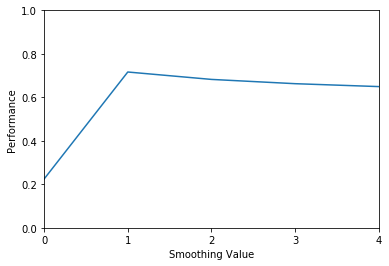

In [1015]:
plt.plot([0,1,2,3,4], [0.22428748451053285, 0.7164804469273742, 0.682437275985663, 0.6627651792245794, 0.6494082840236686])
plt.axis([0, 4, 0, 1])
plt.xlabel('Smoothing Value')
plt.ylabel('Performance')
plt.xticks([0, 1, 2, 3, 4])
plt.show()

In [1256]:
x_train = open("X_train.txt","r")

def better_tokenize(string, my_list):
    my_list.append(string.lower().replace(",", "").replace(".", "").replace("'", "").replace("-", " ").replace("_", " ").split())
#     my_list.append(string.lower()
x_train_tweets = []
tokenized_x_train_tweets = []
for tweets in x_train:
    x_train_tweets.append(tweets)
    better_tokenize(tweets, tokenized_x_train_tweets)

In [799]:
train(smoothing_alpha=2) 

100%|██████████| 129853/129853 [00:00<00:00, 579897.85it/s]


In [800]:
x_dev = open("X_dev.txt","r")

x_dev_tweets = []
tokenized_x_dev_tweets = []
for tweets in x_dev:
    x_dev_tweets.append(tweets)
    better_tokenize(tweets, tokenized_x_dev_tweets)

In [801]:
classification = []
for tweet in tokenized_x_dev_tweets:
    classify(tweet)

In [802]:
x = f1_score(dev_tweets_target, classification, average='binary')
print(x)

0.5121527777777778


In [803]:
# 0.2766749379652606 with better tokenize and alpha = 0 - just lower
# 0.6581132075471698 with better tokenize and alpha = 1 - just lower
# 0.6118935837245697 with better tokenize and alpha = 2 - just lower

# 0.3185947910357359 with better tokenize and alpha = 0
# 0.5486577181208053 with better tokenize and alpha = 1
# 0.5121527777777778 with better tokenize and alpha = 2

In [804]:
x_test = open("X_test.txt","r")

x_test_tweets = []
tokenized_x_test_tweets = []
for tweets in x_test:
    x_test_tweets.append(tweets)
    better_tokenize(tweets, tokenized_x_test_tweets)

In [805]:
classification = []
for tweet in tokenized_x_test_tweets:
    classify(tweet)

In [806]:
df = pd.DataFrame(columns=['Id', 'Category'])

ids = []
i = 0
for x in classification:
    ids.append(i)
    i+=1
    
df['Id'] = ids
df['Category'] = classification

In [807]:
df.to_csv("/Users/img/Desktop/630/Week2/hw1/outputs-NB.csv", index=False)

# Logistic Regression

In [1327]:
unique_tokens = []
for x in x_train_tokens:
    if x not in unique_tokens:
        unique_tokens.append(x)

In [1328]:
df = pd.DataFrame(0, index=range(len(tokenized_x_train_tweets)), columns = unique_tokens)
df

i = 0
for tweet in tokenized_x_train_tweets:
    for word in tweet:
        if word in unique_tokens:
            df.at[i,word] = df.at[i,word] + 1
    i+=1

In [1329]:
sparse = df.as_matrix()

intercept = np.ones((sparse.shape[0], 1))
sparse = np.hstack((sparse, intercept))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [1330]:
def sigmoid(input_vector, beta_vector):
    yhat = 1/(1 + math.e**-(np.dot(beta_vector, input_vector)))
    return yhat

In [1331]:
def log_liklihood(target, betas, matrix_x):
    b_times_x = np.dot(betas, matrix_x)
    ll = target*b_times_x - np.log(1 + math.e**(b_times_x))
    return ll

In [1332]:
def compute_gradient(phat, vector_x, target, learning_rate, betas):
    deriv = (phat-target)*vector_x
    outcome = betas - (learning_rate*deriv)
    return outcome

In [1333]:
predictions = []
def predict(matrix_x, betas):
    i=0
    for x in matrix_x:
        phat = sigmoid(x, betas)
        predictions.append(phat)
    for x in predictions:
        if x>=0.5:
            predictions[i] = 1
        else:
            predictions[i] = 0
        i+=1

In [1334]:
def logistic_regression(matrix_x, targets_vector, learning_rate, num_step):
    
    global betas
    betas = np.asarray([0]*len(matrix_x[0]))
    learning_rate = learning_rate
    num_step = num_step
    rands = list(range(0, 10000))
    
    graph_x = []
    graph_ll = []
    
    i=1
    for index in range(num_step):
        rand = random.choice(rands)
        vector = matrix_x[rand]
        ground_truth_class = targets_vector[rand]
        
        phat = sigmoid(vector, betas) 
#         print(phat)
   
        ll = log_liklihood(ground_truth_class, betas, vector)
        
        graph_x.append(i)
        graph_ll.append(ll)
        i+=1
#         print(ll)
        
        outcome = compute_gradient(phat, vector, ground_truth_class, learning_rate, betas)
        betas = outcome
#         print(outcome)

    global graph_x1
    global graph_x2
    global graph_x3
    graph_x = np.asarray(graph_x)
    graph_x1 = np.mean(graph_x.reshape(-1, 100), axis=1)
    
    global graph_ll1
    global graph_ll2
    global graph_ll3
    graph_ll = np.asarray(graph_ll)
    graph_ll1 = np.mean(graph_ll.reshape(-1, 100), axis=1)
#     print(graph_ll1)

#     plt.plot(graph_x1, graph_ll1)
#     plt.show()

# logistic_regression(sparse, train_tweets_target, 5e-5, 1000)       

In [1335]:
logistic_regression(sparse, train_tweets_target, .05, 3000000) 

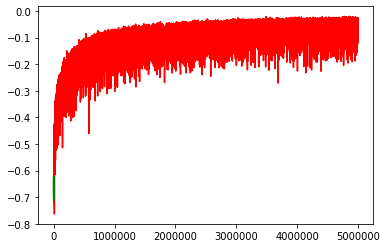

In [1313]:
plt.plot(graph_x1, graph_ll1, c = 'red')
plt.plot(graph_x2, graph_ll2, c = 'blue')
plt.plot(graph_x3, graph_ll3, c = 'green')

plt.show()

In [1336]:
x_dev = open("X_dev.txt","r")

x_dev_tweets = []
tokenized_x_dev_tweets = []
for tweets in x_dev:
    x_dev_tweets.append(tweets)
    better_tokenize(tweets, tokenized_x_dev_tweets)

In [1337]:
df = pd.DataFrame(0, index=range(len(tokenized_x_dev_tweets)), columns = unique_tokens)

i = 0
for tweet in tokenized_x_dev_tweets:
    for word in tweet:
        if word in unique_tokens:
            df.at[i,word] = df.at[i,word] + 1
    i+=1

In [1338]:
sparse = df.as_matrix()

intercept = np.ones((sparse.shape[0], 1))
sparse = np.hstack((sparse, intercept))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [1339]:
predict(sparse, betas)

In [1340]:
x = f1_score(dev_tweets_target, predictions, average='binary')
print(x)

0.7755581668625147


In [1341]:
x_test = open("X_test.txt","r")

x_test_tweets = []
tokenized_x_test_tweets = []
for tweets in x_test:
    x_test_tweets.append(tweets)
    better_tokenize(tweets, tokenized_x_test_tweets)

In [1342]:
df = pd.DataFrame(0, index=range(len(tokenized_x_test_tweets)), columns = unique_tokens)

In [1343]:
i = 0
for tweet in tokenized_x_test_tweets:
    for word in tweet:
        if word in unique_tokens:
            df.at[i,word] = df.at[i,word] + 1
    i+=1

In [1344]:
sparse = df.as_matrix()

intercept = np.ones((sparse.shape[0], 1))
sparse = np.hstack((sparse, intercept))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [1345]:
predictions = []
predict(sparse, betas)

In [1346]:
df = pd.DataFrame(columns=['Id', 'Category'])

ids = []
i = 0
for x in predictions:
    ids.append(i)
    i+=1
    
df['Id'] = ids
df['Category'] = predictions

In [1348]:
df.to_csv("/Users/img/Desktop/630/Week2/hw1/outputs-LR.csv", index=False)

In [36]:
import numpy as np
one_hot = [0,0,1,0,0]
w1 = [[.6,2],[-.9,8],[-.2,2],[.9,1],[.5,4]]
w3 = [[.6,2],[-.9,8],[-.2,2],[.9,1],[.5,4]]

h = np.dot(one_hot,w1)
print("hidden layer: " + str(h))

v = np.dot(w3,h)
print("output layer: "+ str(v))

hidden layer: [-0.2  2. ]
output layer: [ 3.88 16.18  4.04  1.82  7.9 ]


In [46]:
v

array([ 3.88, 16.18,  4.04,  1.82,  7.9 ])

In [37]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))
# np.dot(beta_vector, input_vector)

v_prime_j = v[2]
v_prime_j_t = np.transpose(v[2])

sig = sigmoid(np.dot(v_prime_j_t,h))


In [38]:
new_v_prime_j = v_prime_j - .05*(sig - 1)*h

In [39]:
new_v_prime_j # new_v_prime_j is our new value of w2[2]

array([4.03308317, 4.04003096])

In [40]:
w3

[[0.6, 2], [-0.9, 8], [-0.2, 2], [0.9, 1], [0.5, 4]]

In [42]:
sig = sigmoid(np.dot(v_prime_j_t,h))

v_i_new = h - .05*(sigmoid(sig-1))*v_prime_j

In [43]:
v_i_new
# vi new is now our updated version of w1[2]

array([-0.26739907,  1.89901563])

In [145]:
one_hot = [0,0,1,0,0]
context = [[0,1,0,0,0],[0,0,0,1,0]]
negatives = [[1,0,0,0,0],[0,0,0,0,1]]

w1 = np.random.uniform(-.5, .5, size=(5, 2))
w2 = np.random.uniform(-.5, .5, size=(5, 2))

def sigmoid(x):
    return 1.0/(1+np.exp(-x))

In [146]:
hidden = np.dot(one_hot, w1)
print(hidden)

[-0.1253766  -0.43844393]


In [147]:
output = np.dot(hidden, np.transpose(w2))
output

array([-0.10637021, -0.01977895, -0.08702583, -0.11773726, -0.10651646])

In [148]:
# embedding of the input word in w1
v_i = w1[2]

In [149]:
# embedding of the input word in w2
v_j = w2[2]

In [155]:
# Here is where the perform descent function should start

In [150]:
# Compute the nll here
# v_c* in this equation is the embedding of the context word in the W' matrix

In [151]:
# Make update with the first context word and first negative sample 
lr = .05

# Positive

dot_product_for_sigmoid = np.dot(np.transpose(v_i), hidden)

v_j = v_j - lr * (sigmoid(dot_product_for_sigmoid)-1)*hidden
v_j

summation = lr * (sigmoid(dot_product_for_sigmoid)-1) * v_j

summation

array([ 0.00647374, -0.00606112])

In [152]:
# Negative

dot_product_for_sigmoid = np.dot(np.transpose(v_j), hidden)

v_j = v_j - lr * (sigmoid(dot_product_for_sigmoid)-0)*hidden
print(v_j)

summation = summation + (lr * (sigmoid(dot_product_for_sigmoid)-0) * v_j)


[-0.28587289  0.28097603]


In [153]:
summation

array([-0.00037892,  0.00067416])

In [154]:
v_i = v_i - lr * summation
v_i

array([-0.12535766, -0.43847764])

In [142]:
W1 = np.random.uniform(-.5, .5, size=(5, 2))

In [143]:
W1

array([[ 0.01218864,  0.11239536],
       [-0.33058633, -0.18394748],
       [ 0.376982  ,  0.1986052 ],
       [ 0.23166047, -0.34558651],
       [ 0.00520592, -0.25458162]])

In [144]:
W1[2]

array([0.376982 , 0.1986052])

In [ ]:
# print(generateSamples(1083, 2))
# gives us two random samples that aren't the same as 1083, THE INPUT OF THIS SHOULD BE A ONE HOT ENCODING

# print(cumulative_dict[9586544])
# gives us a one hot encoding 

In [ ]:
# We will have one context word and two negative examples as inputs for this function 
# The ending resulf from this function will return to us negative log liklihood, but it will also update the weights
# of our beta vectors -- we will call the generate samples function within this function 

# (num_samples, learning_rate, center_token, context_words, W1, W2, negative_indices, index_of_w_matricies)
# cumulative_dict[9586544] will get us the one hot index of the sample words

# one_hot_of_context_word = mapped_sequence[context_index]
# one_hot_negative_sample1 = cumulative_dict[negative_indices[0]]
# one_hot_negative_sample2 = cumulative_dict[negative_indices[1]]
# # center_token is one hot of center token

In [ ]:
w1 = np.random.uniform(-.5, .5, size=(5, 2))
w2 = np.random.uniform(-.5, .5, size=(5, 2))

In [2]:
def performDescent(target_W2_index, hidden, lr, W1, W2, context_W2_index, neg1_context_W2_index, neg2_context_W2_index):

	# (target_W2_index, hidden, lr, W1, W2, context word index from W2(context_W2_index), neg1_context_W2_index, neg2_context_W2_index, )
	nll_new = 0

	v_j = W2[context_W2_index]
	summation = lr * (sigmoid(np.dot(np.transpose(v_j), hidden))-1) * v_j
	v_j = v_j - lr * (sigmoid(np.dot(np.transpose(v_j), hidden))-1) * hidden
	W2[context_W2_index] = v_j

	v_j = W2[context_W2_index]
	summation = summation + (lr * sigmoid(np.dot(np.transpose(v_j), hidden))-0) * v_j
	v_j = v_j - lr * (sigmoid(np.dot(np.transpose(v_j), hidden))-0) * hidden
	W2[context_W2_index] = v_j

	v_j = W2[context_W2_index]
	summation = summation + (lr * sigmoid(np.dot(np.transpose(v_j), hidden))-0) * v_j
	v_j = v_j - lr * (sigmoid(np.dot(np.transpose(v_j), hidden))-0) * hidden
	W2[context_W2_index] = v_j

	v_i = W1[context_W2_index]
	v_i = v_i - lr * summation
	W1[context_W2_index] = v_i

		#... (TASK) implement gradient descent. Find the current context token from context_words
		#... and the associated negative samples from negative_indices. Run gradient descent on both
		#... weight matrices W1 and W2.
		#... compute the total negative log-likelihood and store this in nll_new.
		#... You don't have to use all the input list above, feel free to change them
	E = -(math.log(sigmoid(np.dot(W2[context_W2_index], hidden))))
	# E_neg1 = (math.log(sigmoid(np.dot(W2[neg1_context_W2_index], hidden))))
	# E_neg2 = (math.log(sigmoid(np.dot(W2[neg2_context_W2_index], hidden))))
	E_neg = (math.log(sigmoid(np.dot(W2[neg1_context_W2_index], hidden)))) + (math.log(sigmoid(np.dot(W2[neg2_context_W2_index], hidden))))
	nll_new = E - E_neg

In [ ]:
performDescent(2, hidden, .05, W1, W2, context_W2_index, neg1_context_W2_index, neg2_context_W2_index)